#### PPGIA - Unifor - Prof. Daniel - Processamento e analise de imagens digitais - Trabalho04 - Realce II


#### Importação de Bibliotecas

In [15]:
import numpy as np
import pandas as pd
import cv2 
print(cv2.__version__)
#Path Google Colab para CV2
from google.colab.patches import cv2_imshow
from google.colab import files
import dlib
from skimage import io
from PIL import Image 
%matplotlib inline
#A linha acima é necessária para mostrar gráficos Matplotlib dentro de um Notebook Jupyter
from matplotlib import pyplot as plt
#import matplotlib.pylab as plt
import sys
import ipywidgets as widgets
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import cv2
import scipy
import scipy.signal
from scipy import ndimage
#import face_recognition

4.1.2


#### Upload do arquivo

In [2]:
#Upload do arquivo de imagens que será utilizado no exemplo (lena.png)
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving lenna.jpg to lenna.jpg
User uploaded file "lenna.jpg" with length 112283 bytes


#### Funções

In [3]:
#Funcao para Exibir Imagens com matplotlib e cv2
def exibir_imgplt(tmpimg):
  #Importar a Imagem
  image = cv2.imread(tmpimg)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_AREA)
  #Mostra a imagem com matplotlib
  plt.imshow(image)
  plt.show()
  return

#### Exibir a Imagem

In [4]:
#Botão para exibir a imagem que foi realizado Upload
button = widgets.Button(description="Exibir Img CV2PLT")
output = widgets.Output()

def on_button_clicked_exibir_imagem(b):
  with output:
    img = cv2.cvtColor(cv2.imread(next(iter(uploaded))), cv2.COLOR_BGR2RGB)
    print("Exibindo Imagens:")
    print("Resolução: ", img.shape[0: 2])
    #print(img) # Imprimindo a imagem como NumpyArray
    exibir_imgplt(next(iter(uploaded)))
button.on_click(on_button_clicked_exibir_imagem)
display(button, output)

Button(description='Exibir Img CV2PLT', style=ButtonStyle())

Output()

#### Exibir a Imagem em PB

In [5]:
#Funcao para Exibir Imagens em PB com matplotlib e cv2
def exibir_imgpltpb(tmpimg):
  #Importar a Imagem
  image = cv2.imread(tmpimg)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_AREA)
  #Mostra a imagem com matplotlib
  #plt.imshow(image)
  plt.imshow(image, cmap="gray")
  plt.show()
  return

In [17]:
#Botão para exibir a imagem que foi realizado Upload em PB
button1 = widgets.Button(description="Exibir Img CV2PLTPB")
output1 = widgets.Output()

img = cv2.cvtColor(cv2.imread('/content/lenna.jpg'), cv2.COLOR_BGR2GRAY)

def on_button_clicked_exibir_imagempb(b):
  with output1:    
    print("Exibindo Imagens:")
    print("Resolução: ", img.shape[0: 2])
    #print(img) # Imprimindo a imagem como NumpyArray
    exibir_imgpltpb(next(iter(uploaded)))
button1.on_click(on_button_clicked_exibir_imagempb)
display(button1, output1)

Button(description='Exibir Img CV2PLTPB', style=ButtonStyle())

Output()

#### Convolução e Correlação

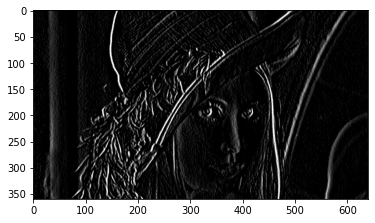

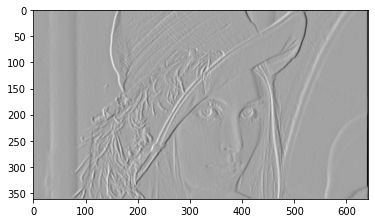

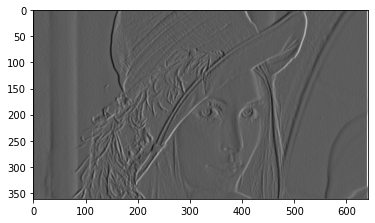

In [18]:
def filter2d(image, kernel, convolve = False):

    return cv2.filter2D(image, 
                        -1, 
                        kernel,
                        borderType=cv2.BORDER_CONSTANT)

kernel = np.array([
                   [-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]
                   ])

result = filter2d(img, kernel, False)
plt.imshow(result, cmap="gray")
plt.show()

result = scipy.signal.correlate2d(img,kernel)
plt.imshow(result, cmap="gray")
plt.show()

result = scipy.signal.convolve2d(img,kernel)
plt.imshow(result, cmap="gray")
plt.show()